In [167]:
import pandas as pd
import matplotlib.pyplot as plt
seed = 42

In [168]:
auspol_file = '/Volumes/extData/Downloads/Auspol_tweets_2022-12-19T09-43.csv'
news_file = '/Volumes/extData/Downloads/NewsMediaBargainingCode_tweets_2022-04-19T13-43.csv'


In [172]:
tweet_cols = ['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope']

sel_cols = ['id', 'created_at', 'from_user_name', 'from_user_id', 'source', 
            'location', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
            'to_user_id', 'to_user_name', 'in_reply_to_status_id',
            'lang', 'possibly_sensitive', 'quoted_status_id']

def tweet_type(row):
    def sub_type(t):
        if t.startswith('retweet'):
            return 'Retweet'
        if t.startswith('in_reply'):
            return 'Reply'
        if t.startswith('quote'):
            return 'Quote'
    if row.isnull().all():
        return 'Original'
    else:
        return sub_type(row.idxmax())

def pre_proc(tweet_df):
    int_cols = ['id', 'from_user_id', 'retweet_id', 'to_user_id', 'in_reply_to_status_id', 'quoted_status_id']
    tweet_df = tweet_df[tweet_df['id'].astype(str).str.isnumeric()]
    tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])
    tweet_df[int_cols] = tweet_df[int_cols].astype(float).astype('Int64')
    tweet_df['source'] = tweet_df['source'].str.extract('\>([\w\s\d]+)\<')
    return tweet_df

def plot_weekly(df, title=''):
    df = df[['created_at', 'id']]
    df.set_index('created_at', inplace=True)
    weekly_counts = df.resample('W').count()
    weekly_counts.plot(kind='line', y='id', figsize=(10, 6))
    plt.title('Count of tweets by Week - {}'.format(title))
    plt.xlabel('Week')
    plt.ylabel('Tweet Count')
    plt.show()


/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/3907446183.py:1: DtypeWarning: Columns (0,3,24,25,26,27,29,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aus = pd.read_csv(auspol_file, usecols=sel_cols)
/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/1370434696.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])
/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/1370434696.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

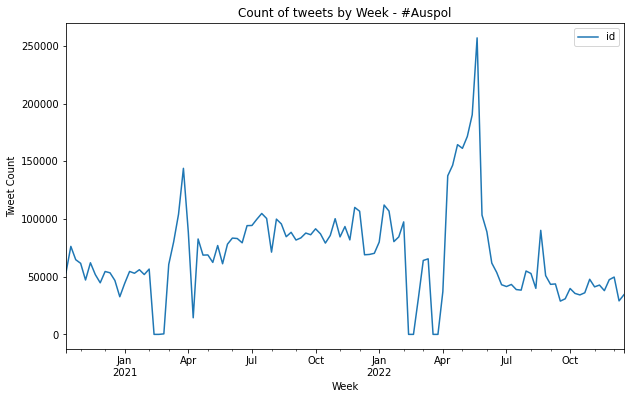

In [170]:
df_aus = pd.read_csv(auspol_file, usecols=sel_cols)
df_aus = pre_proc(df_aus)
plot_weekly(df_aus, '#Auspol')

/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/1162767069.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['created_at'] = pd.to_datetime(tweet_df['created_at'])
/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/1162767069.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df[int_cols] = tweet_df[int_cols].astype(float).astype('Int64')
/var/folders/lt/5wks5rn13vx44v9wqv_z1kcc0000gn/T/ipykernel_93989/1162767069.py:36: SettingWithCopyWarning: 
A value is t

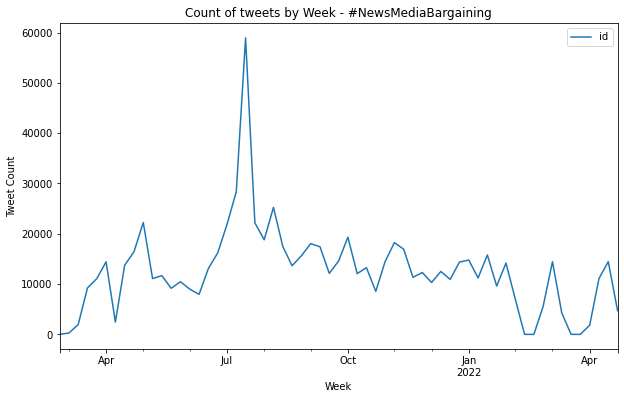

In [173]:
df_news = pd.read_csv(news_file, usecols=sel_cols)
df_news = pre_proc(df_news)
plot_weekly(df_news, '#NewsMediaBargaining')


In [223]:
start_period = pd.to_datetime('2021-03-01')
end_period = pd.to_datetime('2022-04-01')
meta_cols = ['id', 'created_at', 'from_user_name', 'source', 'location', 'text', 'retweet_id', 
             'retweet_count', 'in_reply_to_status_id', 'lang', 'possibly_sensitive', 'quoted_status_id']

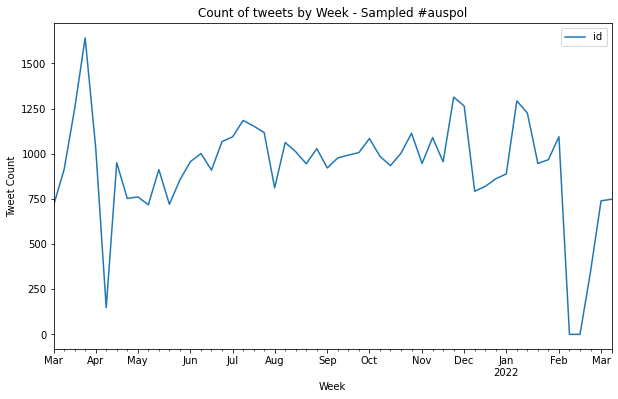

In [226]:
auspol = df_aus[df_aus.created_at >= start_period]
auspol = auspol[auspol.created_at < end_period]
auspol = auspol.sample(50000, random_state=seed)
auspol['tweet_type'] = auspol[['retweet_id', 'in_reply_to_status_id', 'quoted_status_id']].apply(tweet_type, axis=1)
plot_weekly(auspol, 'Sampled #auspol')
auspol.set_index('id', inplace=True)
for id in auspol[auspol.tweet_type=='Original'].index.tolist():
    auspol.loc[id, 'retweet_count'] = df_aus[df_aus['retweet_id'] == id].shape[0] + df_aus[df_aus['quoted_status_id'] == id].shape[0]
auspol.reset_index(inplace=True)
auspol[meta_cols].to_excel('Sample_Auspol_Tweets.xlsx', index=False)

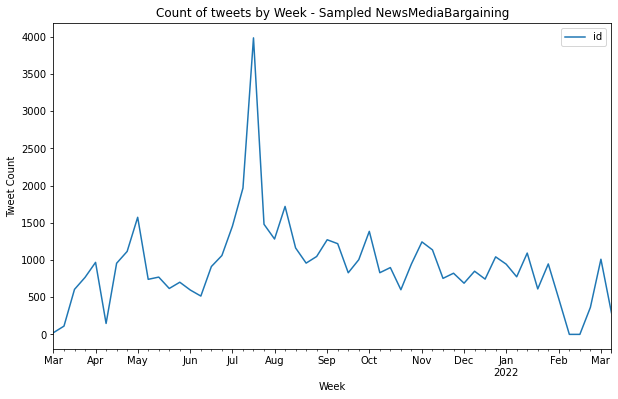

In [225]:
news = df_news[df_news.created_at >= start_period]
news = news[news.created_at < end_period]
news = news.sample(50000, random_state=seed)
news['tweet_type'] = news[['retweet_id', 'in_reply_to_status_id', 'quoted_status_id']].apply(tweet_type, axis=1)
plot_weekly(news, 'Sampled NewsMediaBargaining')
news.set_index('id', inplace=True)
for id in news[news.tweet_type=='Original'].index.tolist():
    news.loc[id, 'retweet_count'] = df_news[df_news['retweet_id'] == id].shape[0] + df_news[df_news['quoted_status_id'] == id].shape[0]
news.reset_index(inplace=True)
news[meta_cols].to_excel('Sample_NewsBargaining_Tweets.xlsx', index=False)

In [228]:
news[meta_cols].to_csv('Sample_NewsBargaining_Tweets.csv', index=False)
auspol[meta_cols].to_csv('Sample_Auspol_Tweets.csv', index=False)